In [1]:
import Bio.PDB
import pandas as pd
import numpy as np

In [2]:
import MDAnalysis
import MDAnalysis.analysis.distances

In [3]:
# Load FH structure
FH_structure = MDAnalysis.Universe("../Data/Structure_data/5upp_allsubunits_Repair.pdb")

In [4]:
FH_allatoms = FH_structure.select_atoms("protein")
# Define binding site residues
binding_siteA = FH_structure.select_atoms('resid 176 182 187 186 188 234 235 378 373 372 371')
binding_siteB = FH_structure.select_atoms('resid 129-135')

In [5]:
a = MDAnalysis.lib.NeighborSearch.AtomNeighborSearch(FH_allatoms)
b = MDAnalysis.lib.NeighborSearch.AtomNeighborSearch(FH_allatoms)

In [6]:
# Generate list of residues near binding site residues
bindingsite_A_residuelist = a.search(binding_siteA, 6, level = "R")
bindingsite_B_residuelist = b.search(binding_siteB, 6, level = "R")

In [7]:
bindingsite_A_residues_6A = []
for item in bindingsite_A_residuelist:
    bindingsite_A_residues_6A.append(item.resid)

In [8]:
bindingsite_B_residues_6A = []
for item in bindingsite_B_residuelist:
    bindingsite_B_residues_6A.append(item.resid)

In [9]:
bindingsite_A_residues_6A = set(bindingsite_A_residues_6A)

In [10]:
bindingsite_B_residues_6A = set(bindingsite_B_residues_6A)

In [11]:
bindingsites_total = bindingsite_A_residues_6A | bindingsite_B_residues_6A

In [12]:
len(bindingsites_total)

114

In [13]:
# save list of bindingsite resides for future use
with open('bindingsite_A_residues_6A.txt', 'w') as filehandle:
    for listitem in bindingsite_A_residues_6A:
        filehandle.write('%s\n' % listitem)

## Plot distance

In [14]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import repeat

In [15]:
# define rectangle plotting function
def plotrec(x1, x2, y, name, color):
    width = abs(x2-x1)
    height = 2
    ax_middle.add_patch(patches.Rectangle([x1, y], width, height, lw = 2, facecolor = color, edgecolor = "k", zorder = 2))
    ax_middle.annotate(name, [x1+40,y-1.75], size = 12, ha = "center")

In [16]:
# define dictionary containing subunits
FH_subunits = {"D1 Subunit": [50, 188, "#43A9DB"], "D2 Subunit": [189, 439, "#FB4459"], "D3 Subunit": [440, 509, "#FFFC79"]}


In [17]:
matplotlib.rcParams['figure.figsize'] = [14, 8]

In [18]:
mutationlist = pd.read_csv("../Figure_1/FH_mutation_frequencyframe.csv")

In [19]:
# same as before - generate the count array for plotting the mutation frequency
mutationlist_freq = []
for index, columns in mutationlist.iterrows():
    mutationlist_freq.extend(repeat(int(columns["Residue"]), int(columns["Count"])))
    
print(mutationlist_freq)

[233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 233, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 230, 230, 230, 230, 230, 230, 230, 230, 397, 397, 397, 397, 397, 397, 397, 117, 117, 117, 117, 117, 117, 117, 318, 318, 318, 318, 318, 318, 174, 174, 174, 174, 174, 196, 196, 196, 196, 282, 282, 282, 180, 180, 180, 188, 188, 188, 216, 216, 216, 465, 465, 465, 333, 333, 333, 376, 376, 376, 361, 361, 340, 340, 386, 386, 453, 453, 171, 171, 229, 229, 334, 334, 365, 365, 366, 366, 373, 373, 373, 195, 195, 195, 275, 275, 434, 434, 425, 425, 341, 341, 341, 341, 346, 160, 350, 350, 268, 261, 274, 274, 298, 308, 101, 444, 439, 317, 385, 254, 185, 142, 51, 369, 87, 73, 435, 394, 322, 140, 381, 375, 330, 277, 419, 399, 194, 239, 258, 187, 158, 374, 192, 309, 244, 211, 132, 467, 337, 355, 362, 402, 53, 235, 312, 312, 135, 97, 69, 218, 303, 354, 315, 377, 189, 329, 310, 454, 382, 368, 507, 126, 335, 103]


In [20]:
mutationlist_freq_count = []
for x in range(49, 510):
    counter = mutationlist_freq.count(x)
    mutationlist_freq_count.append([int(x), counter])
    
mutationcount_freq = pd.DataFrame.from_records(mutationlist_freq_count)
mutationcount_freq.columns= ["Residue", "Mutnumber"]

In [21]:
# read in the summary file containing all the data
mutation_dataarray = pd.read_csv("../Data/Structure_data/FH_complete_mutation_summary.csv")

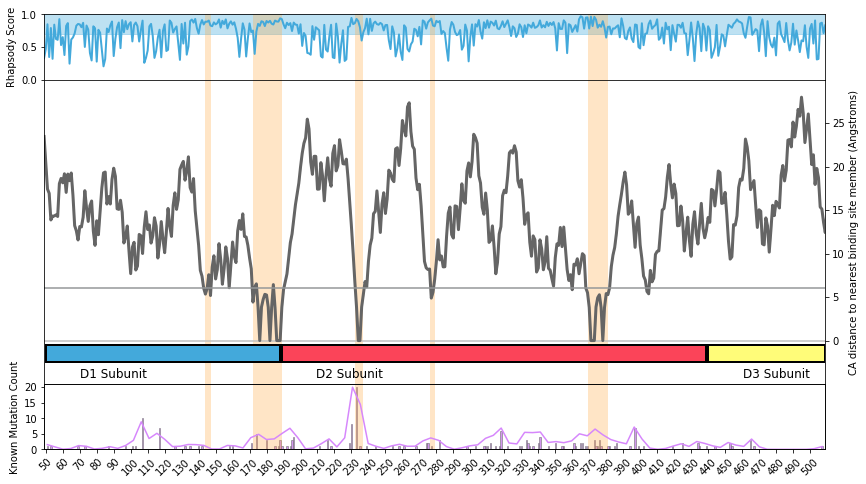

In [22]:
f, (ax_top, ax_middle, ax_bottom) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .7, .15)})
f.subplots_adjust(hspace = 0)
plt.xticks(rotation=45)


# Countplot on the bottom axis
sns.countplot(mutationlist_freq, ax = ax_bottom, color="#D687FC", order = list(range(0,510)), linewidth = 0.5, edgecolor = "#656565")
ax_bottom_twin = ax_bottom.twinx()
sns.kdeplot(mutationlist_freq, ax = ax_bottom_twin, color="#D687FC", bw = 0.025) 
                                                                #     ^ This parameter appears to do different things in different versions of matplotlib, it may need tweaking
ax_bottom_twin.set_yticks([])

# Mutation distance on the middle axis
ax_middle.set(xlim = (49,509))
ax_middle.set(ylim = (-5,30))
ax_middle.set_yticks([0,5,10,15,20,25])
ax_middle.axhline(0, color = "#C0C0C0")
ax_middle.yaxis.tick_right()
ax_middle.yaxis.set_label_position("right")

sns.lineplot(x = mutation_dataarray["Residue"], y = mutation_dataarray["Mindist_bindingsiteA"],lw = 3, color = "#656565", ax = ax_middle)
sns.lineplot(x = mutation_dataarray["Residue"], y = mutation_dataarray["rhapsodyscore"], lw =2, color = "#43A9DB", ax = ax_top, ci = None )

# Rhapsody score on the top axis
ax_top.set_yticks([0,0.5, 1])
ax_top.set(ylim = (0,1))
ax_top.axhspan(0.7, 1, alpha=0.5, color='#7CC4E7')
ax_bottom.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
ax_bottom.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax_bottom.set_yticks([0,5,10,15,20])
ax_top.set_ylabel("Rhapsody Score")
ax_middle.set_ylabel("CA distance to nearest binding site member (Angstroms)")
ax_bottom.set_ylabel("Known Mutation Count")
ax_middle.axhline(6, color = "#949798")

for key, residues in FH_subunits.items():
    plotrec(residues[0],residues[1], -2.5, key, residues[2])
  

ax_middle.axvspan(144,147, facecolor= "#FFA945", alpha = 0.3)
ax_middle.axvspan(172,189, facecolor= "#FFA945", alpha = 0.3)
ax_middle.axvspan(232,237, facecolor= "#FFA945", alpha = 0.3)
ax_middle.axvspan(276,279, facecolor= "#FFA945", alpha = 0.3)
ax_middle.axvspan(369,381, facecolor= "#FFA945", alpha = 0.3)

ax_top.axvspan(144,147, facecolor= "#FFA945", alpha = 0.3)
ax_top.axvspan(172,189, facecolor= "#FFA945", alpha = 0.3)
ax_top.axvspan(232,237, facecolor= "#FFA945", alpha = 0.3)
ax_top.axvspan(276,279, facecolor= "#FFA945", alpha = 0.3)
ax_top.axvspan(369,381, facecolor= "#FFA945", alpha = 0.3)


ax_bottom.axvspan(144,147, facecolor= "#FFA945", alpha = 0.3)
ax_bottom.axvspan(172,189, facecolor= "#FFA945", alpha = 0.3)
ax_bottom.axvspan(232,237, facecolor= "#FFA945", alpha = 0.3)
ax_bottom.axvspan(276,279, facecolor= "#FFA945", alpha = 0.3)
ax_bottom.axvspan(369,381, facecolor= "#FFA945", alpha = 0.3)


plt.savefig("Figure2_A_bindingsitedistance.png", dpi = 400)